# import all necessory libraries & Load the data set

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


titanic_df = pd.read_csv('Titanic-Dataset.csv')


# View the first few rows
# print(titanic_df.to_string())
# titanic_df.tail()
titanic_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Describe all the data 

In [41]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# check the shape of data

In [43]:
titanic_df.shape

(891, 12)

# check the how many missing values 

In [44]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

   # Count how many Passenger Survived OR not  

In [45]:

titanic_df['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

# conver Surviveal pasanger in bar Ghraph (red=0 OR Green=1)

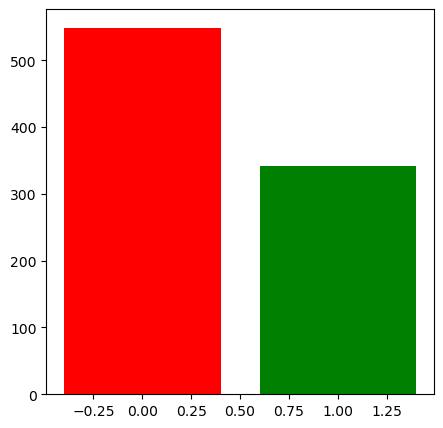

In [46]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_df['Survived'].value_counts().keys()), list(titanic_df['Survived'].value_counts()),color=["r","g"])
plt.show()

# count the passanger class 

In [47]:
titanic_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

# convert pclass in bar () plot

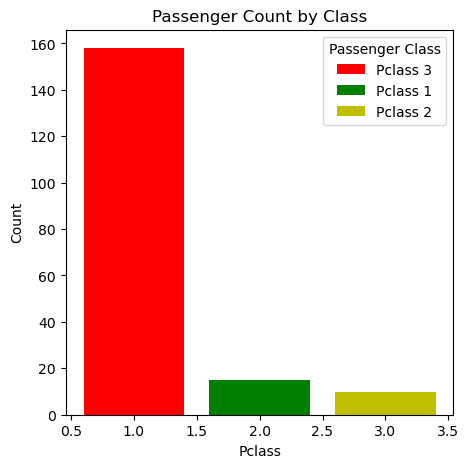

In [74]:
# plt.figure(figsize=(5,5))
# plt.bar(list(titanic_df['Pclass'].value_counts().keys()), list(titanic_df['Pclass'].value_counts()),color=["r","g","y"])
# plt.show()
plt.figure(figsize=(5,5))

# Bar chart with labels for legend
plt.bar(list(titanic_df['Pclass'].value_counts().keys()), 
        list(titanic_df['Pclass'].value_counts()), 
        color=["r","g","y"], 
        label=["Pclass 3", "Pclass 1", "Pclass 2"])  # order depends on value_counts()

# Add legend and labels
plt.legend(title="Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Passenger Count by Class")
plt.show()


# count the Sex(male or female) 

In [49]:
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

# Convert Gendar in bar plot

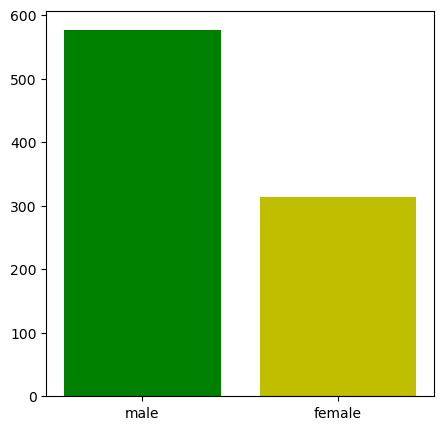

In [50]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_df['Sex'].value_counts().keys()), list(titanic_df['Sex'].value_counts()),color=["g","y"])
plt.show()

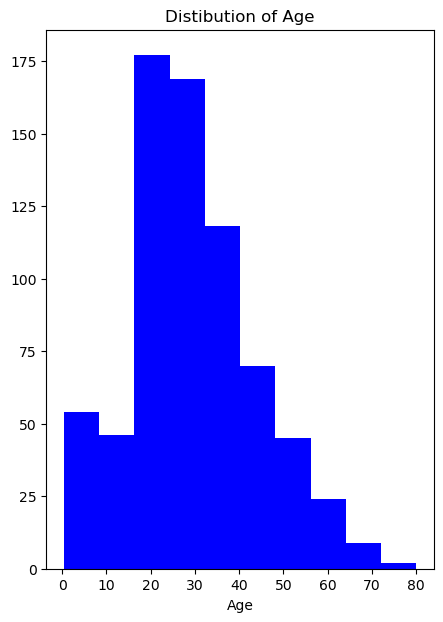

In [51]:
plt.figure(figsize=(5,7))
plt.hist(titanic_df['Age'],color="blue")
plt.title("Distibution of Age")
plt.xlabel("Age")
plt.show()

# check nullvalue present in Survived

In [52]:
# titanic_df['Survived'].isnull()
# sum(titanic_df['Survived'].isnull())  # if the null is present then will be show True
sum(titanic_df['Survived'].isnull())



0

# check nullvalue present in Age

In [53]:
sum(titanic_df['Age'].isnull())

177

# Remove the nullVallue

In [54]:
titanic_df=titanic_df.dropna()

# Check Delete null value

In [55]:
sum(titanic_df['Age'].isnull())

0

In [56]:
x_titanic=titanic_df[['Age']]
y_titanic=titanic_df[['Survived']]


# Build a ClasssiFication Model using Tree Library

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dtc=DecisionTreeClassifier() # dtc is object of DecisionTreeClassifier() 


# building the model using fit() function

In [59]:
dtc.fit(x_titanic,y_titanic)

DecisionTreeClassifier()

# predicting the values

In [60]:
sum(titanic_df['Age'].isnull())

0

In [61]:
x_titaniic=titanic_df[['Age']]

# predict the Servival passengers

In [62]:
y_pred=dtc.predict(x_titanic)


In [63]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [73]:
y_pred = dtc.predict(x_titanic)

# Initialize counters
survived_count = 0
not_survived_count = 0

# Loop through predictions
for i, pred in enumerate(y_pred):
    if pred == 1:
        print(f"Passenger {i + 1}: Survived")
        survived_count += 1
    else:
        print(f"Passenger {i + 1}: Did not survive")
        not_survived_count += 1

# Print summary
print("\n--- Summary ---")
print(f"Total Survived: {survived_count}")
print(f"Total Did Not Survive: {not_survived_count}")


Passenger 1: Survived
Passenger 2: Survived
Passenger 3: Did not survive
Passenger 4: Survived
Passenger 5: Survived
Passenger 6: Survived
Passenger 7: Survived
Passenger 8: Did not survive
Passenger 9: Survived
Passenger 10: Did not survive
Passenger 11: Did not survive
Passenger 12: Did not survive
Passenger 13: Did not survive
Passenger 14: Survived
Passenger 15: Did not survive
Passenger 16: Did not survive
Passenger 17: Survived
Passenger 18: Survived
Passenger 19: Did not survive
Passenger 20: Survived
Passenger 21: Survived
Passenger 22: Did not survive
Passenger 23: Did not survive
Passenger 24: Did not survive
Passenger 25: Survived
Passenger 26: Did not survive
Passenger 27: Survived
Passenger 28: Did not survive
Passenger 29: Survived
Passenger 30: Did not survive
Passenger 31: Survived
Passenger 32: Survived
Passenger 33: Survived
Passenger 34: Survived
Passenger 35: Did not survive
Passenger 36: Survived
Passenger 37: Survived
Passenger 38: Survived
Passenger 39: Survived


# Model Evaluation (Check Accuracy):
You can see how correctly the model is making predictions using accuracy_score.

In [64]:
from sklearn.metrics import accuracy_score

# Define your true labels
y_true = y_titanic  # Make sure this variable exists

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.8142076502732241
